In [1]:
import torch.nn as nn
import numpy as np
import torch

kernel = nn.Conv2d( 
    in_channels = 1, 
    out_channels = 1, 
    kernel_size = 5, 
    stride = 1 , 
    padding = 2 ,
    padding_mode = "zeros", 
    dilation = 1 ,
    groups = 1 , 
    bias = True 
)
relu = nn.ReLU()
maxpool = nn.MaxPool2d(2, stride=2)

In [2]:
def ourKernel():
    newKernel = np.array([[0.0625,-0.0625,0.0,-0.0625,0.0625],
                          [-0.0625,0.0625,0.0,0.0625,-0.0625],
                          [ -0.125,-0.0625,0.5,-0.0625,-0.125],
                          [-0.0625,0.0625,0.0,0.0625,-0.0625],
                          [0.0625,-0.0625,0.0,-0.0625,0.0625]]
                        ).reshape((1,1,5,5))
    newKernel = nn.Parameter(torch.tensor(newKernel,dtype =torch.float32 ),requires_grad = False)
    return newKernel

In [3]:
from torchvision import transforms

from PIL import Image

img = Image.open(r"F:\master1\DicHomework\finalExam\3x3\data\bleach.png")
img = img.convert("L")
transform = transforms.Compose([
    transforms.PILToTensor(),
    transforms.Resize([64,64],antialias=True)
#     transforms.Grayscale()
#     transforms.ConvertImageDtype(torch.float32)
])
img_tensor = transform(img)
img_tensor = img_tensor.to(torch.float32)
img_tensor.shape
# img_tensor

torch.Size([1, 64, 64])

In [4]:
kernel.weight = ourKernel()
kernel.weight

Parameter containing:
tensor([[[[ 0.0625, -0.0625,  0.0000, -0.0625,  0.0625],
          [-0.0625,  0.0625,  0.0000,  0.0625, -0.0625],
          [-0.1250, -0.0625,  0.5000, -0.0625, -0.1250],
          [-0.0625,  0.0625,  0.0000,  0.0625, -0.0625],
          [ 0.0625, -0.0625,  0.0000, -0.0625,  0.0625]]]])

In [5]:
kernel.bias = nn.Parameter(torch.tensor([-0.75],dtype = torch.float32),requires_grad = False)
kernel.bias

Parameter containing:
tensor([-0.7500])

In [6]:
afterConv = kernel(img_tensor)
# print(afterConv)
afterRelu = relu(afterConv)
afterMaxpool = maxpool(afterRelu)
# afterMaxpool = afterRelu
afterCeiling = torch.ceil(afterMaxpool)


In [7]:
result_tensor = afterCeiling
result_tensor.shape

torch.Size([1, 32, 32])

True

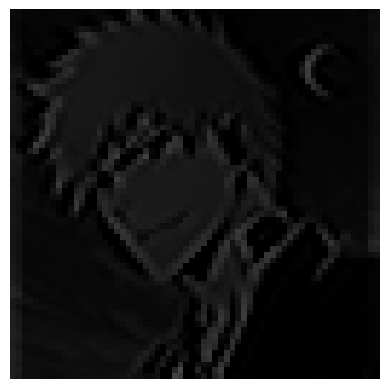

In [8]:
from matplotlib import pyplot as plt
import cv2
plt.axis("off")
plt.imshow(afterRelu.squeeze(),cmap='gray', vmin=0, vmax=255)

# plt.savefig(r"F:\master1\DicHomework\hw4\afterRelu.png", bbox_inches='tight')
cv2.imwrite(r"./afterRelu.png",afterRelu.squeeze().numpy())

True

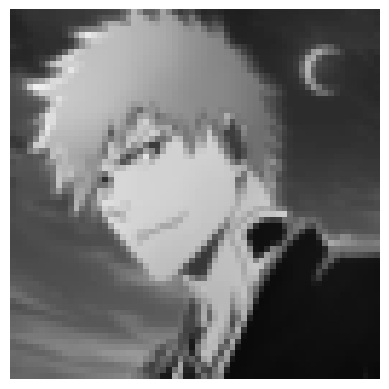

In [9]:
plt.imshow(img_tensor.squeeze(),cmap='gray', vmin=0, vmax=255)
plt.axis("off")
# plt.savefig(r"F:\master1\DicHomework\hw4\resizedImg.png", bbox_inches='tight')
cv2.imwrite(r"./resizedImg.png",img_tensor.squeeze().numpy())

True

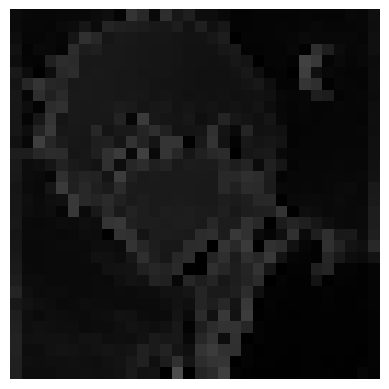

In [10]:
plt.imshow(result_tensor.squeeze(),cmap='gray', vmin=0, vmax=255)
plt.axis("off")
# plt.savefig(r"F:\master1\DicHomework\hw4\result.png", bbox_inches='tight')
cv2.imwrite(r"./result.png",result_tensor.squeeze().numpy())

In [11]:
# from pathlib import Path

# cwd = Path.cwd()
# print(cwd)
# imgDataPath = cwd/"img.dat"
# afterConvDataPath = cwd/"Conv.dat"
# goldenDataPath = cwd/"golden.dat"
# if not imgDataPath.exists():
#     imgDataPath.touch()

# if not goldenDataPath.exists():
#     goldenDataPath.touch()
# if not afterConvDataPath.exists():
#     afterConvDataPath.touch()



# with open(imgDataPath, mode="w+") as file:
#     # write text to the file
#     for i  in img_tensor.flatten():
#         file.write(str(int(i))+"\n")
    
# with open(goldenDataPath, mode="w+") as file:
#     # write text to the file
#     for i  in result_tensor.flatten():
#         file.write(str(int(i))+"\n")
# with open(afterConvDataPath, mode="w+") as file:
#     # write text to the file
#     for i  in afterConv.flatten():
#         file.write(str(i.numpy())+"\n")

In [12]:
result_tensor

tensor([[[11.,  8.,  7.,  ...,  8.,  7., 15.],
         [10.,  7.,  7.,  ...,  6.,  7., 14.],
         [13.,  6.,  6.,  ...,  8.,  6., 16.],
         ...,
         [34., 13., 13.,  ...,  2.,  1.,  4.],
         [32., 15., 14.,  ...,  1.,  2.,  4.],
         [31., 13., 13.,  ...,  1.,  6.,  3.]]])

In [13]:
from fxpmath import Fxp

x = Fxp(afterMaxpool.numpy(),signed=True,n_word=13,n_frac=4)

In [14]:
x.info(verbose=3)

	dtype		=	fxp-s13/4
	Value		=	[[[10.6875  7.125   6.3125 ...  7.25    6.4375 14.3125]
  [ 9.8125  6.5625  6.1875 ...  5.4375  6.875  13.75  ]
  [12.9375  5.0625  5.6875 ...  7.5625  5.875  15.9375]
  ...
  [33.3125 12.0625 12.9375 ...  1.1875  0.875   3.4375]
  [31.1875 14.5625 13.875  ...  0.5625  1.5     3.5   ]
  [30.125  12.6875 12.25   ...  0.6875  5.625   2.9375]]]

	Signed		=	True
	Word bits	=	13
	Fract bits	=	4
	Int bits	=	8
	Val data type	=	<class 'float'>

	Upper		=	255.9375
	Lower		=	-256.0
	Precision	=	0.0625
	Overflow	=	saturate
	Rounding	=	trunc
	Shifting	=	expand



In [15]:
# Path("./modelsimRoot/data").mkdir(exist_ok=True)

In [16]:
# img_dat generator
print(img_tensor.shape)
imgBin = Fxp(img_tensor.numpy(),signed=True,n_word=13,n_frac=4)
print(imgBin.bin()[0].flatten())
imgBinFlatten =imgBin.bin()[0].flatten()

imgFlatten = img_tensor.flatten().numpy()

imgFlatten

with open("./img.dat","w+") as imgFile:
    for i,(binVal,decVal) in enumerate(zip(imgBinFlatten,imgFlatten)):
#         print(binVal,decVal)
        imgFile.write(f"{binVal} //data {i}: {decVal}\n")

torch.Size([1, 64, 64])
['0001010000000' '0001011010000' '0001100010000' ... '0000101010000'
 '0000011000000' '0000010100000']


In [17]:
# afterRelu generator
print(afterRelu.shape)
afterReluBin = Fxp(afterRelu.numpy(),signed=True,n_word=13,n_frac=4)
print(afterReluBin.bin()[0].shape)
afterReluBinFlatten = afterReluBin.bin()[0].flatten()
afterReluFlatten = afterRelu.flatten().numpy()
print(afterReluFlatten.shape)
with open("./layer0_golden.dat","w+") as imgFile:
    for i,(binVal,decVal) in enumerate(zip(afterReluBinFlatten,afterReluFlatten)):
#         print(binVal,decVal)
        imgFile.write(f"{binVal} //data {i}: {decVal}\n")

torch.Size([1, 64, 64])
(64, 64)
(4096,)


In [18]:
# result
print(result_tensor.shape)
resultBin = Fxp(result_tensor.numpy(),signed=True,n_word=13,n_frac=4)
print(resultBin.bin()[0].shape)
resultBinFlatten = resultBin.bin()[0].flatten()
resultFlatten = result_tensor.flatten().numpy()

with open("./layer1_golden.dat","w+") as imgFile:
    for i,(binVal,decVal) in enumerate(zip(resultBinFlatten,resultFlatten)):
#         print(binVal,decVal)
        imgFile.write(f"{binVal} //data {i}: {decVal}\n")

torch.Size([1, 32, 32])
(32, 32)


In [19]:
len(resultBinFlatten)

1024

In [20]:
Fxp(kernel.weight.numpy(),signed=True,n_word=13,n_frac=4).hex()


[array([[['0x0001', '0x1FFF', '0x0000', '0x1FFF', '0x0001'],
         ['0x1FFF', '0x0001', '0x0000', '0x0001', '0x1FFF'],
         ['0x1FFE', '0x1FFF', '0x0008', '0x1FFF', '0x1FFE'],
         ['0x1FFF', '0x0001', '0x0000', '0x0001', '0x1FFF'],
         ['0x0001', '0x1FFF', '0x0000', '0x1FFF', '0x0001']]], dtype='<U6')]

In [21]:
from fxpmath import Fxp
Fxp(-0.75,signed=True,n_word=13,n_frac=4).hex()

'0x1FF4'

In [22]:
kernel.weight

Parameter containing:
tensor([[[[ 0.0625, -0.0625,  0.0000, -0.0625,  0.0625],
          [-0.0625,  0.0625,  0.0000,  0.0625, -0.0625],
          [-0.1250, -0.0625,  0.5000, -0.0625, -0.1250],
          [-0.0625,  0.0625,  0.0000,  0.0625, -0.0625],
          [ 0.0625, -0.0625,  0.0000, -0.0625,  0.0625]]]])